In [20]:
from src.optimize import RGD
from src.tucker import Tucker
from src.matrix import TuckerMatrix

from src import backend as back

import numpy as np
import matplotlib.pyplot as plt

Following examples illustrates calculation of minimal eigenvalue of the
symmetric positive defined matrix.

Let $R(x) = \frac{\langle x, Ax\rangle}{\|x\|^2}$ be Rayleigh quotient,
then $\min\limits_{x} R(x)$ is exactly minimal eigenvalue of self adjoint
linear operator $A$.

Let us represent $A$ as self adjoint linear operator on linear space
$\mathbb{R}^{n \times \ldots \times n}$. Then we might want to solve the
following problem

\begin{align*}
    \min\limits_{x \in \mathcal{M}_{\textbf{r}}} R(x).
\end{align*}

Where by $\mathcal{M}_{\textbf{r}}$ we denote Riemann submanifold of tensors
of fixed multilinear rank. So let us launch basic Riemann steepest descent to
find the solution:

In [18]:
"""
    A: operator on space R^{10 x 10}
    X: tensor from space R^{10 x 10}
"""

random_seed = 42
np.random.seed(random_seed)

def R(x: Tucker):
    return (x.flat_inner(A @ x)) / x.flat_inner(x)

n = 100
k = np.sqrt(n).astype(int)
A = np.random.randint(1, 1001, n)
exact_solution = A.min()
A = back.diag(A)
Q = back.qr(back.randn((n, n), random_seed))[0]
A = Q @ A @ Q.T
A = TuckerMatrix.full2tuck(A.reshape([k] * 4),
                           [k] * 2, [k] * 2)

X = back.randn((n,))
X = Tucker.full2tuck(X.reshape([k] * 2))

X, history = RGD(R, X, tolerance=1e-8, trace=True)

print(f"Exact solution is \t{exact_solution}")
print(f"Found solution is \t%.5f" % R(X))

Exact solution is 	2
Found solution is 	2.00057


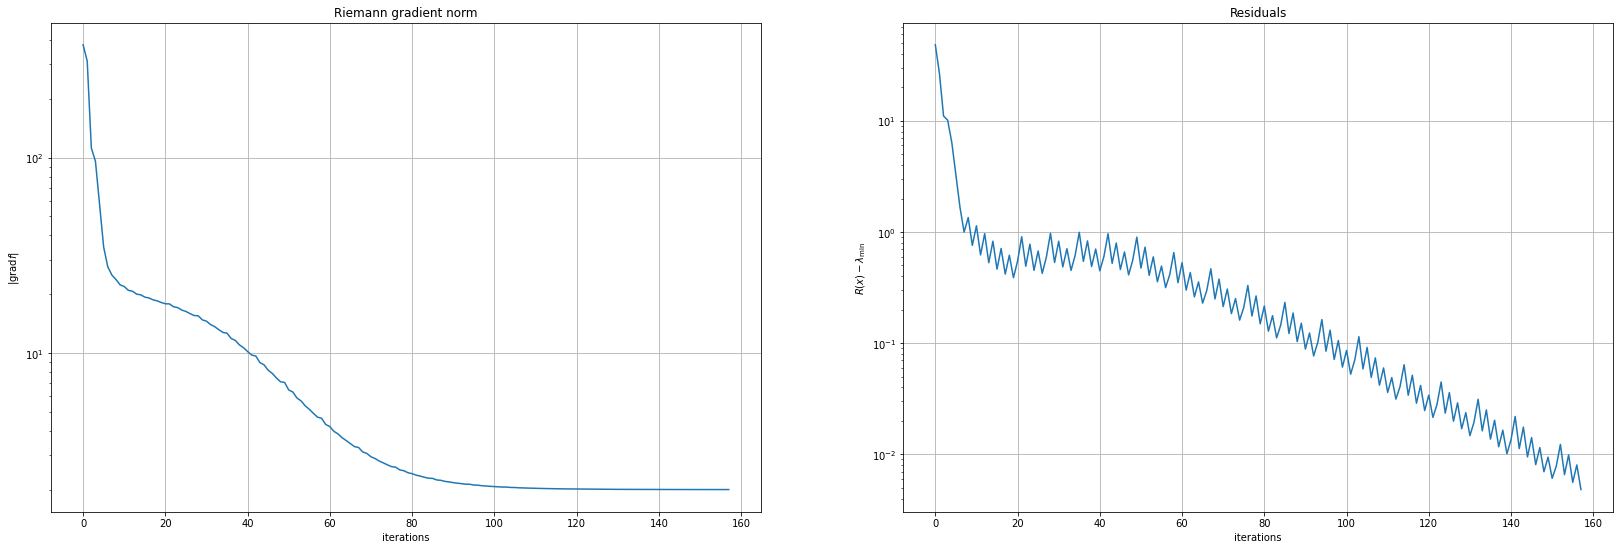

In [24]:
f, ax = plt.subplots(ncols=2, nrows=1, figsize=(28, 9))
ax[0].set(title="Riemann gradient norm", xlabel="iterations", ylabel=r"$\|\mathrm{grad} f\|$")
ax[1].set(title="Residuals", xlabel="iterations", ylabel=r"$R(x) - \lambda_{\min}$")


ax[0].semilogy(np.arange(len(history["func"])), history["func"])
ax[1].semilogy(np.arange(len(history["grad_norm"])), history["grad_norm"])

ax[0].grid()
ax[1].grid()

plt.show()